In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [3]:
var_dict = dict(
    numerical_vars = ['Alcohol','Malic_acid','Ash','Alcalinity_of_ash',
                      'Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols',
                      'Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines',
                      'Proline'],
    class_var = 'class'
)

In [34]:
exp = Experiment('data/wine.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.001,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 3),
                 n_init_bins_list=[10])

In [35]:
%time clustering_scores = exp.test_clustering_performance()

CPU times: user 27.2 s, sys: 684 ms, total: 27.9 s
Wall time: 27.5 s


In [36]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 13, NMI = 0.4288
agglomerative, #Cols = 13, NMI = 0.4161


In [37]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 13, NMI = 0.8759
agglomerative, #Cols = 13, NMI = 0.7865


In [38]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.5555
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.5865


In [39]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.7021
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.6716


In [40]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 56, NMI = 0.8032
agglomerative
#Init Bins = 10, #Cols = 56, NMI = 0.8020


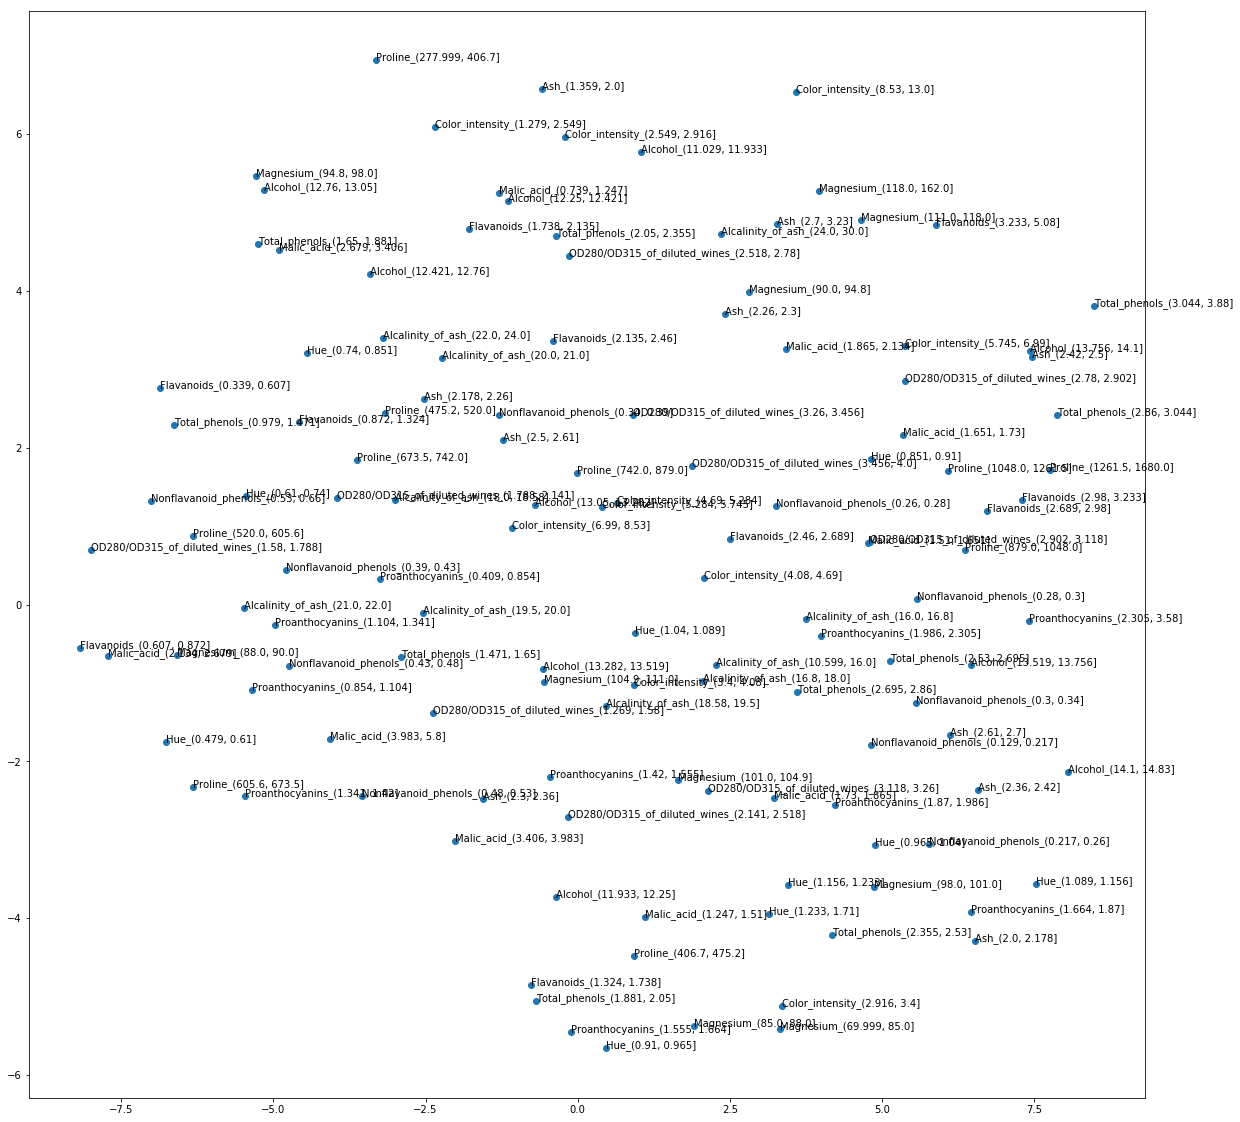

In [41]:
exp.semantic_binning.visualize_bin_embeddings()

In [42]:
%time clf_scores = exp.test_classification_performance(cv=3)

CPU times: user 1min 26s, sys: 1.38 s, total: 1min 28s
Wall time: 1min 27s


In [43]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.949 (+/- 0.083)


In [44]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.989 (+/- 0.016)


In [45]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.848 (+/- 0.025)
LR performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.915 (+/- 0.074)
NB performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.916 (+/- 0.029)


In [46]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.888 (+/- 0.041)
LR performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.950 (+/- 0.047)
NB performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.938 (+/- 0.032)


In [47]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 55.666666666666664, Accuracy = 0.876 (+/- 0.125)
LR performance
#Init Bins = 10, #Avg Cols = 55.666666666666664, Accuracy = 0.938 (+/- 0.017)
NB performance
#Init Bins = 10, #Avg Cols = 55.666666666666664, Accuracy = 0.933 (+/- 0.028)


In [117]:
exp.data.shape

(178, 14)

In [133]:
exp = Experiment('data/wine.csv', 
                 var_dict,
                 embedding_dim=2,
                 lr=0.001,
                 batch_size=16,
                 n_epoch=300,
                 verbose=True,
                 n_bins_range=range(2, 3),
                 n_init_bins_list=[10])

In [134]:
exp.semantic_binning.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.6784502863883972
>>> Epoch = 2, Loss = 0.5994504690170288
>>> Epoch = 3, Loss = 0.5608235597610474
>>> Epoch = 4, Loss = 0.5044652819633484
>>> Epoch = 5, Loss = 0.4814130663871765
>>> Epoch = 6, Loss = 0.4404695928096771
>>> Epoch = 7, Loss = 0.415101557970047
>>> Epoch = 8, Loss = 0.3805525302886963
>>> Epoch = 9, Loss = 0.3723754584789276
>>> Epoch = 10, Loss = 0.34228792786598206
>>> Epoch = 11, Loss = 0.31920909881591797
>>> Epoch = 12, Loss = 0.31951388716697693
>>> Epoch = 13, Loss = 0.31099817156791687
>>> Epoch = 14, Loss = 0.27109622955322266
>>> Epoch = 15, Loss = 0.27458229660987854
>>> Epoch = 16, Loss = 0.28707945346832275
>>> Epoch = 17, Loss = 0.2697165012359619
>>> Epoch = 18, Loss = 0.25867971777915955
>>> Epoch = 19, Loss = 0.2611778974533081
>>> Epoch = 20, Loss = 0.24370183050632477
>>> Epoch = 21, Loss = 0.2532537281513214
>>> Epoch = 22, Loss = 0.24277976155281067
>>> Epoch = 23, Loss = 0.23430609703063965
>>> Epoch = 24, Loss = 0.25779759

>>> Epoch = 191, Loss = 0.22410106658935547
>>> Epoch = 192, Loss = 0.21987169981002808
>>> Epoch = 193, Loss = 0.22329901158809662
>>> Epoch = 194, Loss = 0.2224472016096115
>>> Epoch = 195, Loss = 0.22907628118991852
>>> Epoch = 196, Loss = 0.21907855570316315
>>> Epoch = 197, Loss = 0.21756549179553986
>>> Epoch = 198, Loss = 0.22444289922714233
>>> Epoch = 199, Loss = 0.22037804126739502
>>> Epoch = 200, Loss = 0.22432896494865417
>>> Epoch = 201, Loss = 0.21889691054821014
>>> Epoch = 202, Loss = 0.22440533339977264
>>> Epoch = 203, Loss = 0.21905875205993652
>>> Epoch = 204, Loss = 0.2215859442949295
>>> Epoch = 205, Loss = 0.22125869989395142
>>> Epoch = 206, Loss = 0.21682003140449524
>>> Epoch = 207, Loss = 0.21917138993740082
>>> Epoch = 208, Loss = 0.22157424688339233
>>> Epoch = 209, Loss = 0.22145864367485046
>>> Epoch = 210, Loss = 0.22158488631248474
>>> Epoch = 211, Loss = 0.22088639438152313
>>> Epoch = 212, Loss = 0.22482691705226898
>>> Epoch = 213, Loss = 0.22345170

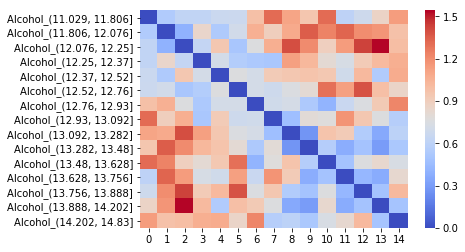

In [120]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Alcohol')

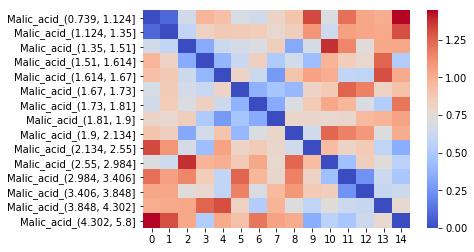

In [121]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Malic_acid')

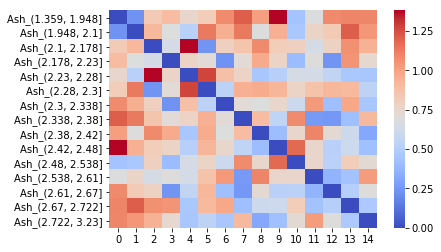

In [122]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Ash')

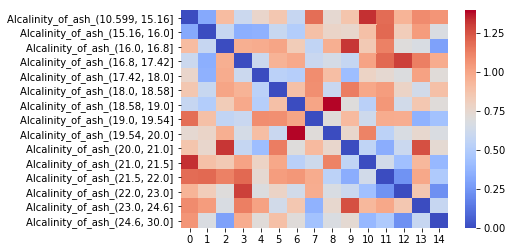

In [123]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Alcalinity_of_ash')

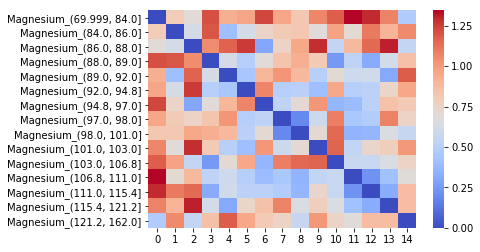

In [124]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Magnesium')

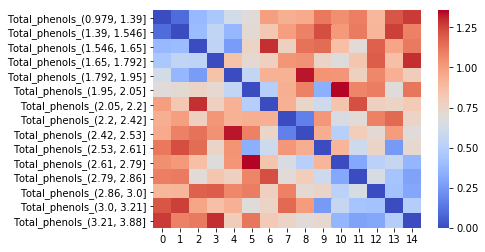

In [125]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Total_phenols')

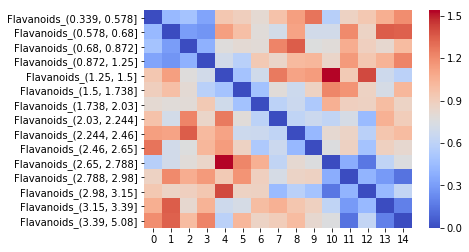

In [126]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Flavanoids')

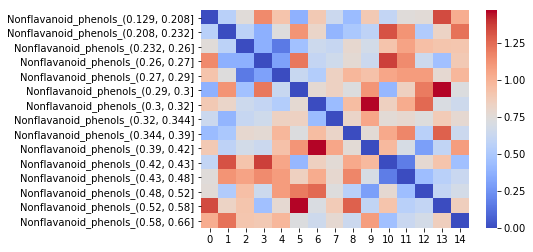

In [127]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Nonflavanoid_phenols')

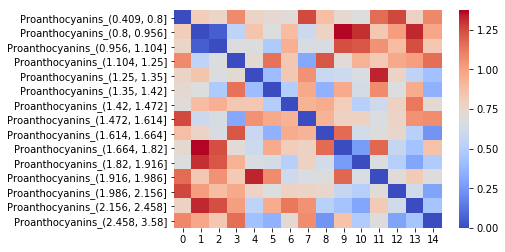

In [128]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Proanthocyanins')

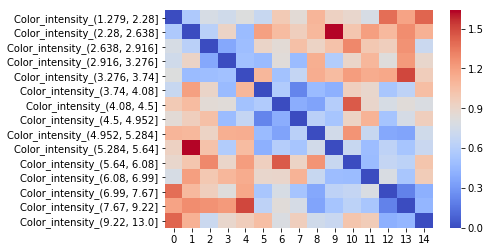

In [129]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Color_intensity')

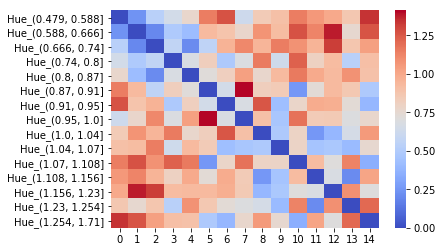

In [130]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Hue')

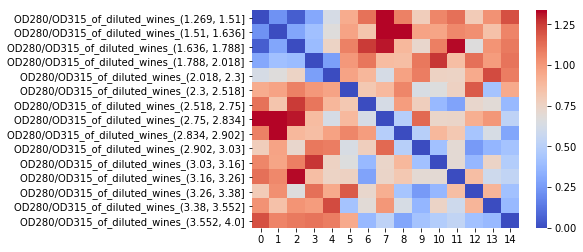

In [131]:
exp.semantic_binning.plot_pairwise_distance_between_bins('OD280/OD315_of_diluted_wines')

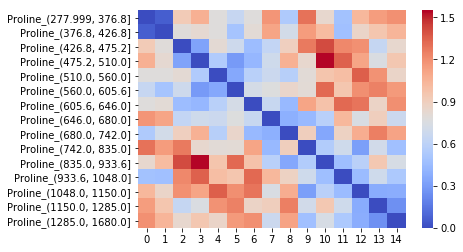

In [132]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Proline')

In [116]:
for var, bins in exp.semantic_binning.bins_by_var.items():
    print(var)
    print(bins['bins'])

Alcohol
['(11.029, 11.806]', '(11.806, 12.076]', '(12.076, 12.25]', '(12.25, 12.37]', '(12.37, 12.52]', '(12.52, 12.76]', '(12.76, 12.93]', '(12.93, 13.092]', '(13.092, 13.282]', '(13.282, 13.628]', '(13.628, 13.756]', '(13.756, 13.888]', '(13.888, 14.83]']
Malic_acid
['(0.739, 1.51]', '(1.51, 1.67]', '(1.67, 1.73]', '(1.73, 1.81]', '(1.81, 1.9]', '(1.9, 2.134]', '(2.134, 2.55]', '(2.55, 3.848]', '(3.848, 5.8]']
Ash
['(1.359, 1.948]', '(1.948, 2.1]', '(2.1, 2.178]', '(2.178, 2.23]', '(2.23, 2.28]', '(2.28, 2.338]', '(2.338, 2.38]', '(2.38, 2.42]', '(2.42, 2.538]', '(2.538, 2.61]', '(2.61, 2.67]', '(2.67, 2.722]', '(2.722, 3.23]']
Alcalinity_of_ash
['(10.599, 15.16]', '(15.16, 16.0]', '(16.0, 17.42]', '(17.42, 18.0]', '(18.0, 19.0]', '(19.0, 20.0]', '(20.0, 21.0]', '(21.0, 21.5]', '(21.5, 23.0]', '(23.0, 30.0]']
Magnesium
['(69.999, 84.0]', '(84.0, 86.0]', '(86.0, 88.0]', '(88.0, 89.0]', '(89.0, 92.0]', '(92.0, 98.0]', '(98.0, 101.0]', '(101.0, 103.0]', '(103.0, 121.2]', '(121.2, 162.0]